In this exercise, we will introduce an apparatus that allows us to investigate the hypothesis of a simple linear dependence of a random variable on another variable () and build a linear regression model for this dependence. In this case, we often call the variable the dependent variable and the independent variable. It should also be noted that here we do not consider it as a random variable and assume that it can be measured with sufficient precision, i.e., it is only a variable that is burdened by experimental error.





### Example of types of regressions

|        equation       |R formula   |
|-------------------|---------------------|
|  $f(x) = α $|  y ~ 1 |
|  $f(x) = α + \beta x$  | y ~ x  |
|  $f(x) = α + \beta x + γ x^2$ | y ~ x + I(x^2)   |
|  $f(x) = α + \beta_1 x_1 + \beta_2 x_2 $ | y ~ x1 + x2  |
|   $f(x) = α + \beta_1 x_1 + \gamma x_1 x_2 $| y ~ x2 * x2  |

What is the use of tilde operator?
<br>

~ defines relationship between dependent variable and independent variables in a statistical model formula. Left side of the formula is dependent variable, right side independent variable.

# Simple Linear regression

In the case of a simple linear regression, we assume that the following relationship exists between the dependent variable and the independent variable:

$
y = \alpha + \beta x
$

In other words, this relationship can be described by a straight line equation where the parameter $\beta$ is its slope and the parameter  $\alpha$ is the intercept.

This type of relationship is quite common or at least a very good approximation of the actual process. 

![image](https://data-science-blog.com/wp-content/uploads/2022/05/linear-regression-header-845x321.png)

from: https://data-science-blog.com/blog/2022/05/02/understanding-linear-regression-with-all-statistical-terms/

 [1]  1  2  3  4  5  6  7  8  9 10



Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42879 -0.17771 -0.02385  0.08534  0.69398 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.37798    0.22188    6.21 0.000257 ***
x            0.93724    0.03576   26.21 4.82e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3248 on 8 degrees of freedom
Multiple R-squared:  0.9885,	Adjusted R-squared:  0.987 
F-statistic: 686.9 on 1 and 8 DF,  p-value: 4.825e-09


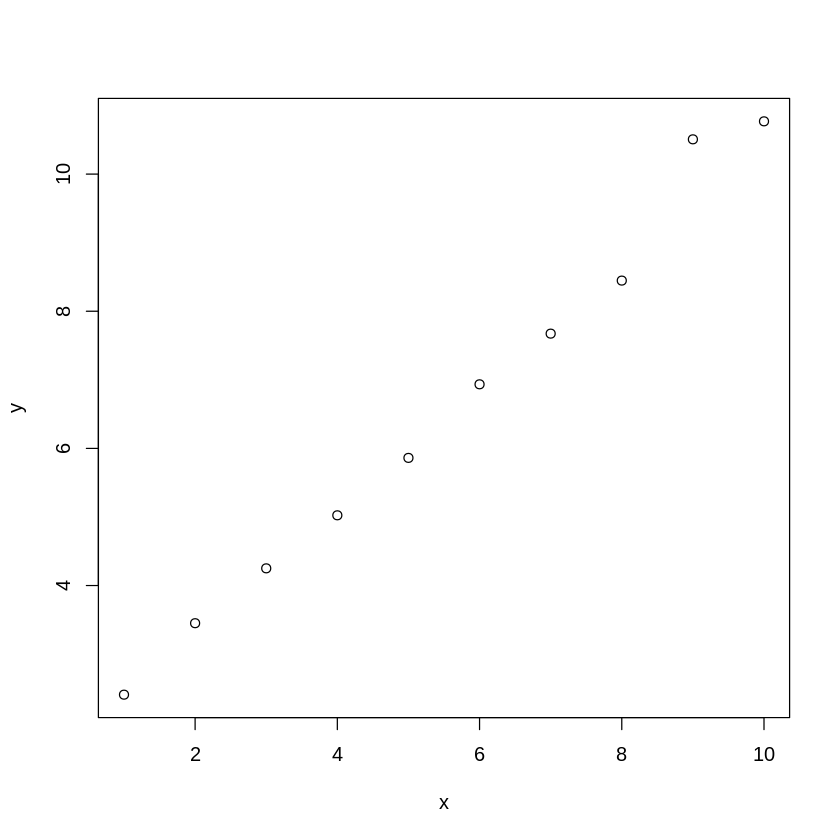

In [35]:
x <- 1:10
y <- 2:11 + rnorm(10, sd=0.5)
print(x)
plot(x, y)

lin_model <- lm(y ~ x)
summary(lin_model)

### Let's look closer at the formula
$
𝒀 = α + β * 𝐗
$
<br><br>
We want to compute coefficients, but how? Here we can employ the least square method: <br><br>
$
\hat{β} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}
$
<br><br>
in matrix form<br>
$
\hat{β} = (𝐗^T𝐗)^{-1}(𝑿^T𝐘) )
$
<br>
<br>
Or we can look at the problem using calculus:<br>
We are looking for such coefficients $\alpha$ and β that would minimize sum of squares:
<br><br>
$
S(\alpha, \beta) = \sum_{i=1}^n [y(x_i) -y_i]^2 = \sum_{i=1}^n (\alpha +\beta x_i - y_i)^2
$
<br><br>
To find a minimum for $S(\alpha, \beta)$ we need to equate both partial derivatives to zero:
<br><br>
$
\frac{∂S}{\partial α} = 2 \sum_{i=1}^n (\alpha +\beta x_i - y_i) x_i = 0
$
<br><br>
$
\frac{∂S}{\partial \beta} = 2 \sum_{i=1}^n (\alpha +\beta x_i - y_i) x_i = 0
$
<br><br>
By modifying these equations, prescriptions for both coefficients can be obtained. It can also be shown that there is only one solution, and thus using this method we always find the optimal equation that corresponds to the minimum.

#### Matrix multiplication operator


```
x %*% y
```




Multiplies two matrices, if they are conformable. If one argument is a vector, it will be promoted to either a row or column matrix to make the two arguments conformable. If both are vectors of the same length, it will return the inner product (as a matrix).

#### Solve function
solve(a: coefficients of the equation, b: vector or matrix of the equation)  
 it is a generic R function used to solving linear algebraic equations (a %*% x = b)<br>
 https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/solve
 <br>
a: a square numeric or complex matrix containing the coefficients of the linear system. Logical matrices are coerced to numeric <br>
b: a numeric or complex vector or matrix giving the right-hand side(s) of the linear system.  <br>
If missing, b is taken to be an identity matrix and solve will return the inverse of a.


#### A little repetition

$
𝐀 * 𝐀^{-1} = 𝐈
$

$𝐈 = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{bmatrix}$

In [38]:
# let's try it step by step

# We need to add column of ones to X matrix
X <- cbind(rep(1, 10), matrix(x))

print('X.t X')
XX <- t(X)%*%X
XX
print('___________________________________________________')
print('1 / X.t X ')
XX_minus_one <- solve(XX) # notice missing b argument, identity matrix is used instead
XX_minus_one
print('___________________________________________________')
print('Betas')
beta <- XX_minus_one%*%t(X)%*%y
beta

[1] "X.t X"


10,55
55,385


[1] "___________________________________________________"
[1] "1 / X.t X "


0.46666667,-0.06666667
-0.06666667,0.01212121


[1] "___________________________________________________"
[1] "Betas"


1.3779829
0.9372407


In [39]:
b <- solve(t(X)%*%X)%*%t(X)%*%y
b

1.3779829
0.9372407


In [40]:
b <- solve(crossprod(X), crossprod(X,y))
b

1.3779829
0.9372407


In [41]:
lin_model


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
     1.3780       0.9372  


In [42]:
lin_model$coefficients[1]
lin_model$coefficients[2]

(Intercept) 
   1.377983

x 
0.9372407

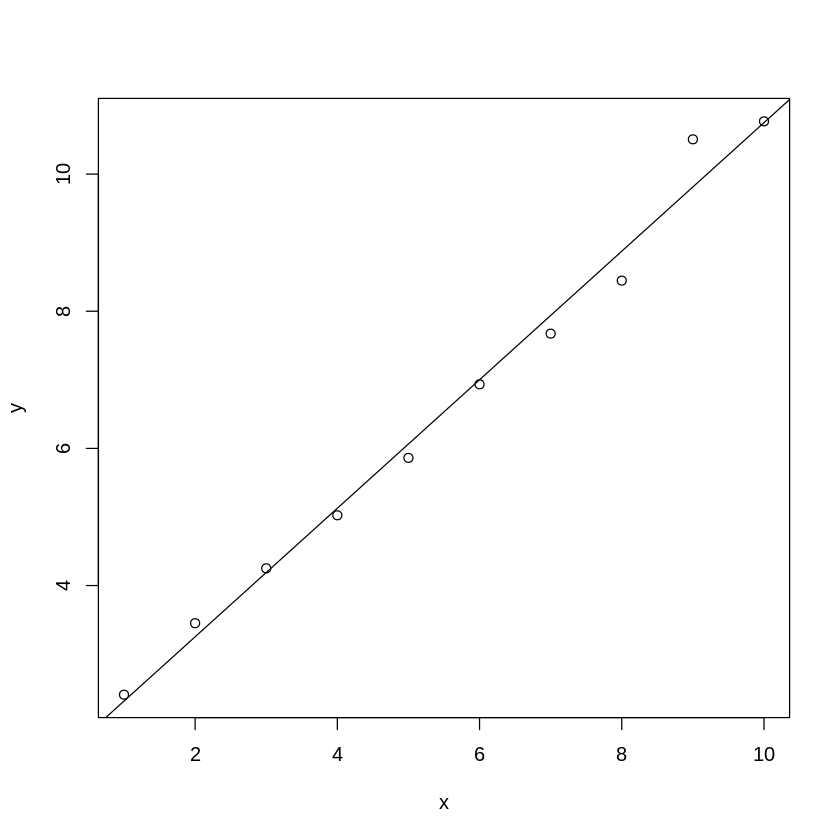

In [44]:
# let's use this information to draw a regression line

plot(x, y)
abline(lin_model)

Lets create a function that will describe our data.
We can think of this function as the absolute truth that we are trying to discover through our experiments. In practice, the exact prescription of this function is hidden and we try to determine its parameters α and β from the available data.

In [47]:
# Function to generate linear relationship

get_linear_relationship <- function(a, b) {
    print(paste('Generating linear relationship:', a, '+', b,'* x'))
    
    return(function(x) {return(a + b * x)
        }
    )
}

ground_truth <- get_linear_relationship(5, 2)
ground_truth

[1] "Generating linear relationship: 5 + 2 * x"


function(x) {return(a + b * x)
        }
<environment: 0x5624fa632158>

In [49]:
x <- -10:10
ground_truth(x)

[1] -15 -13 -11  -9  -7  -5  -3  -1   1   3   5   7   9  11  13  15  17  19  21
[20]  23  25

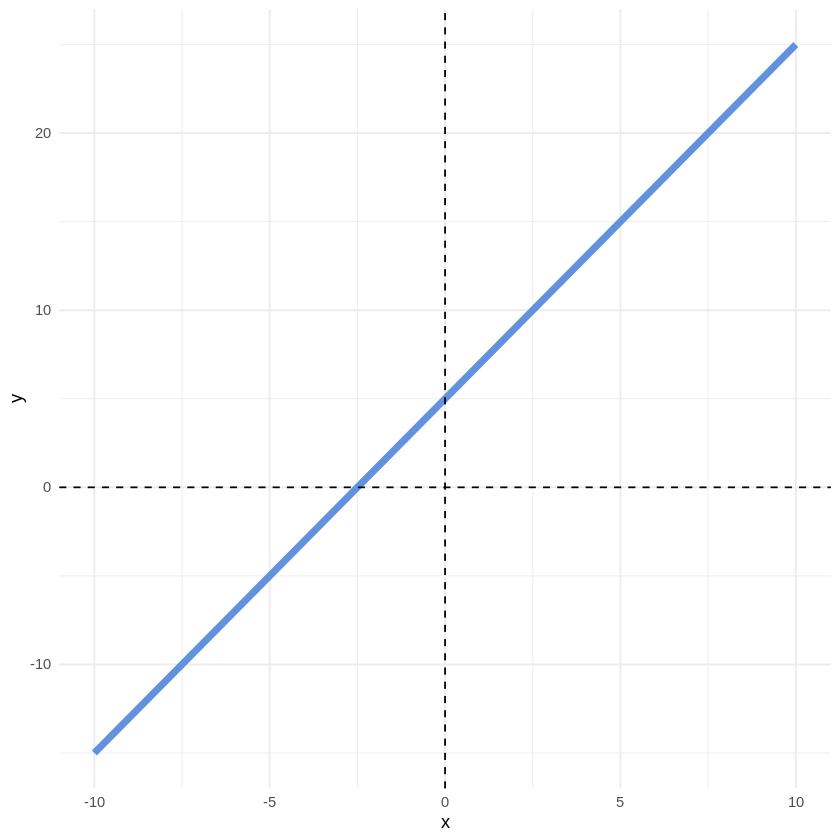

In [53]:
# We can create a plot function using ggplot for a nicer visual representation
library('ggplot2')

my_plot_theme <- function(plt) {
    plt + geom_hline(yintercept = 0, linetype="dashed"
    ) + geom_vline(xintercept = 0, linetype="dashed"
    ) + theme_minimal()
}

plot_function <- function(fun, x) {
    plt <- ggplot(data.frame(x=x, y=fun(x)),aes(x, y)) + 
           geom_line(color='#6291de', linewidth=2)
    
    return(my_plot_theme(plt))
} 

plot_function(ground_truth, -10:10)

In [76]:
# And now we will try to simulate a measurements of x and y variables

constant_measurements <- function(n_measurements, xmin = -1, xmax = 1) {
    # simulated values for x
    # distance between x values is constant and depends on number of measurements
    seq(xmin, xmax, (xmax - xmin) / n_measurements)
}

normal_error <- function(y, sd = 1) {
    # random error is applicated on y variable from N(0, sd)
    y + rnorm(length(y), mean = 0, sd = sd)
}

simulate_measurements <- function(
    fun, # used function
    measuring_strategy, # value interval
    measuring_error, # how to simulate an error of experiment
    n_measurements = 100 # number of measurements
) {
    x <- measuring_strategy(n_measurements)
    y <- fun(x)
    y <- measuring_error(y)
    
    return(data.frame(x=x,y=y))
}

df_experiment <- simulate_measurements(
    ground_truth,
    measuring_strategy = constant_measurements,
    measuring_error = normal_error,
    n_measurements = 10
)
dim(df_experiment)
df_experiment

[1] 11  2

x,y
<dbl>,<dbl>
-1.0,3.375874
-0.8,2.386686
-0.6,4.707040
-0.4,3.961897
-0.2,3.982617
0.0,5.274928
0.2,3.677692
0.4,6.297731
0.6,7.623837


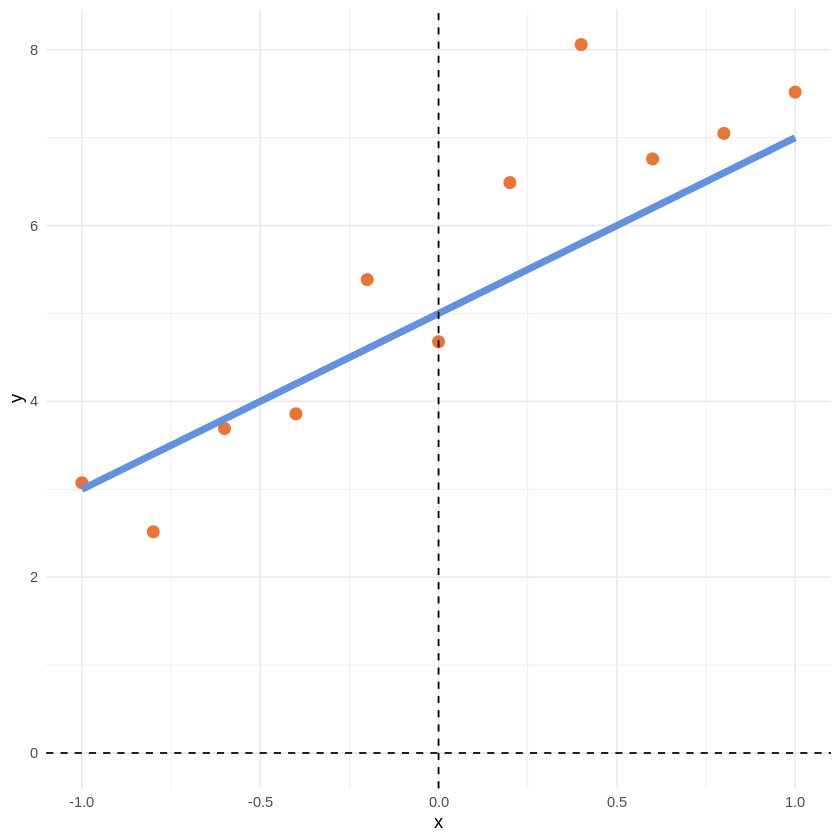

In [61]:
plot_experiment <- function(data, fun = NULL) {
    plt <- ggplot(data, aes(x=x, y=y)) + 
           geom_point(color='#e87435', size=3)
    
    if(!is.null(fun)) {
        plt <- plt + geom_line(aes(y=fun(x)), color='#6291de', linewidth=2)
    }
    return(my_plot_theme(plt))
} 

plot_experiment(df_experiment, ground_truth)

[1] "Generating linear relationship: 5 + 2 * x"


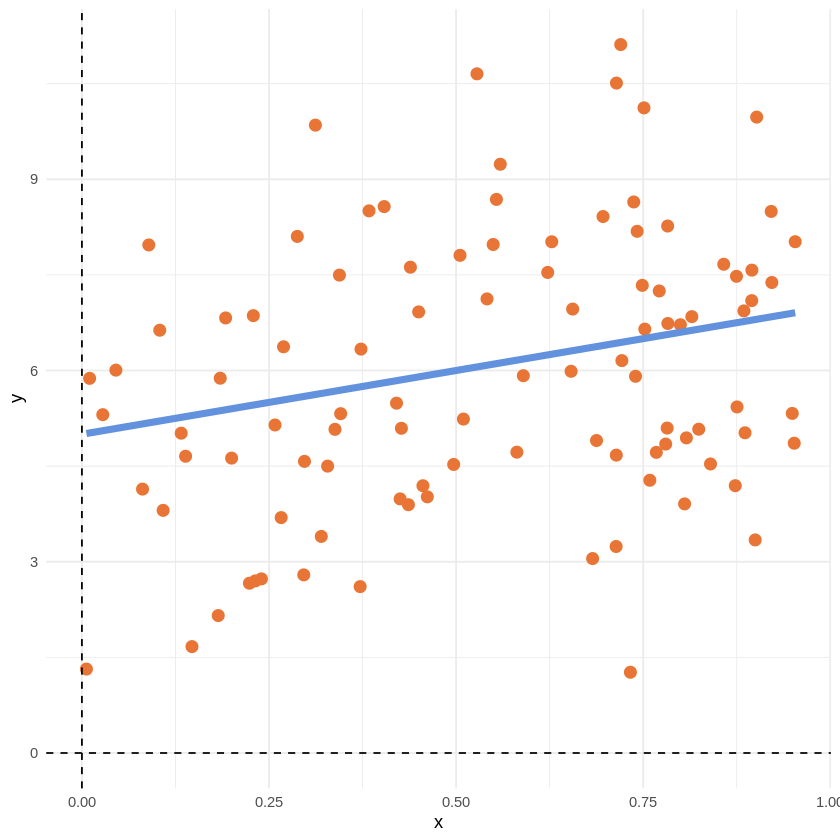

In [69]:
ground_truth <- get_linear_relationship(a = 5, b = 2)

df_experiment <- simulate_measurements(
    ground_truth,
    measuring_strategy = function(n_measurements) {
        #constant_measurements(n_measurements, xmin = -10, xmax = 10)
        runif(n_measurements, 0, 1)
    },
#     measuring_strategy = rnorm,
#     measuring_strategy = rlnorm,
#     measuring_strategy = runif,
    measuring_error = function(y) {
        normal_error(y, sd = 2)
    },
    n_measurements = 100
)
plot_experiment(df_experiment, ground_truth)

In [73]:
head(df_experiment)

,x,y
,<dbl>,<dbl>
1,0.4252332,3.986176
2,0.9211106,8.495303
3,0.8053755,3.907690
4,0.7138606,3.239360
5,0.8399843,4.533991
6,0.1920779,6.824747


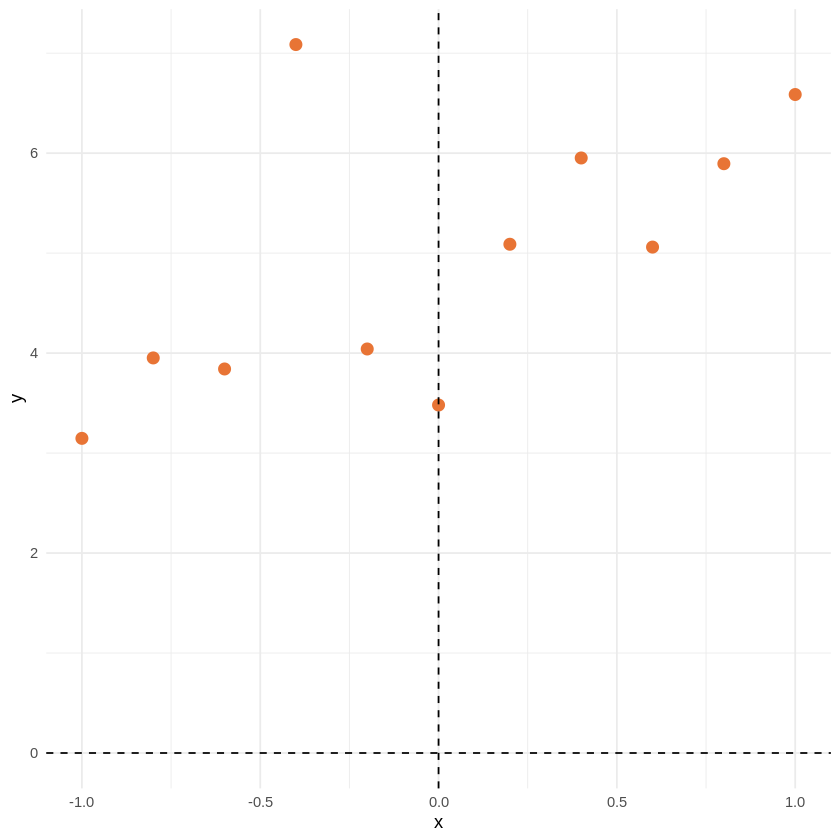

In [80]:
plot_experiment(df_experiment)

In [89]:
# Residuals

df <- mtcars
fit <- lm(mpg ~ hp, data = d)
fit


Call:
lm(formula = mpg ~ hp, data = d)

Coefficients:
(Intercept)           hp  
   30.09886     -0.06823  


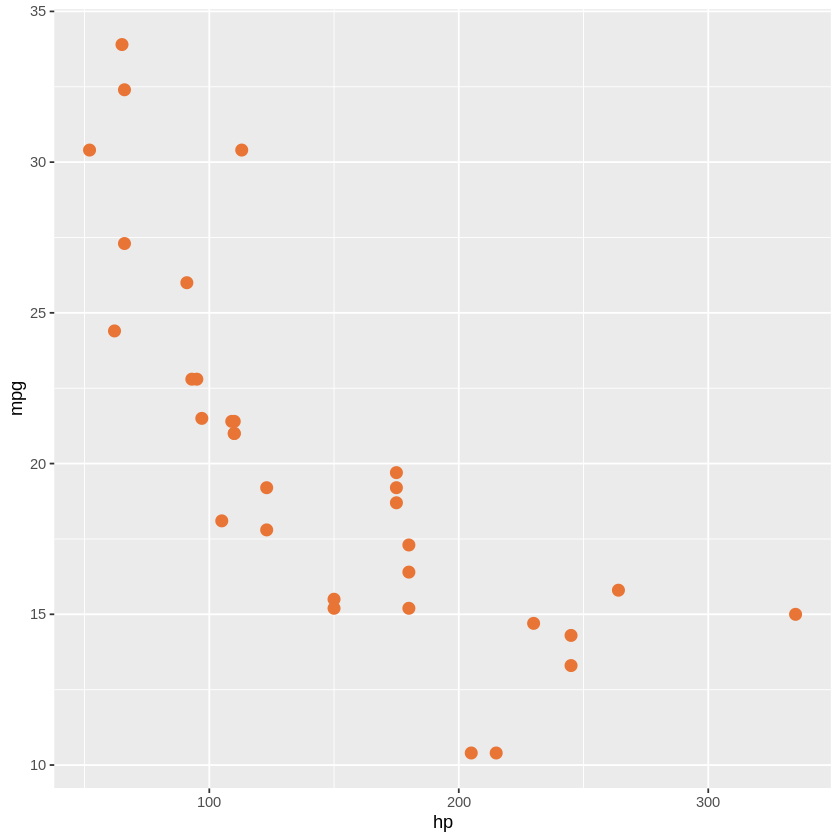

In [108]:
plt <- ggplot(df, aes(x = hp, y = mpg)) + 
       geom_point(color='#e87435', size=3)
        
plt 

In [109]:
df$predicted <- predict(fit)
df$residuals <- residuals(fit)

head(df)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,predicted,residuals
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,22.59375,-1.5937500
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,22.59375,-1.5937500
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,23.75363,-0.9536307
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,22.59375,-1.1937500
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,18.15891,0.5410881
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1,22.93489,-4.8348913


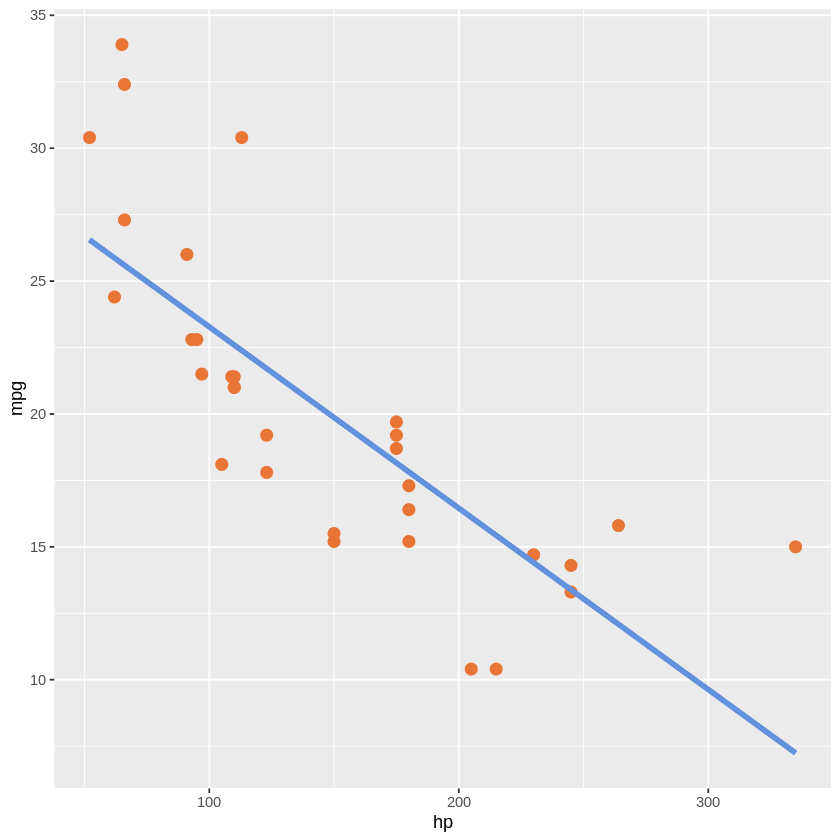

In [115]:
plt <- plt + geom_line(aes(hp, predicted), color='#6291de', linewidth=1.5)
plt      

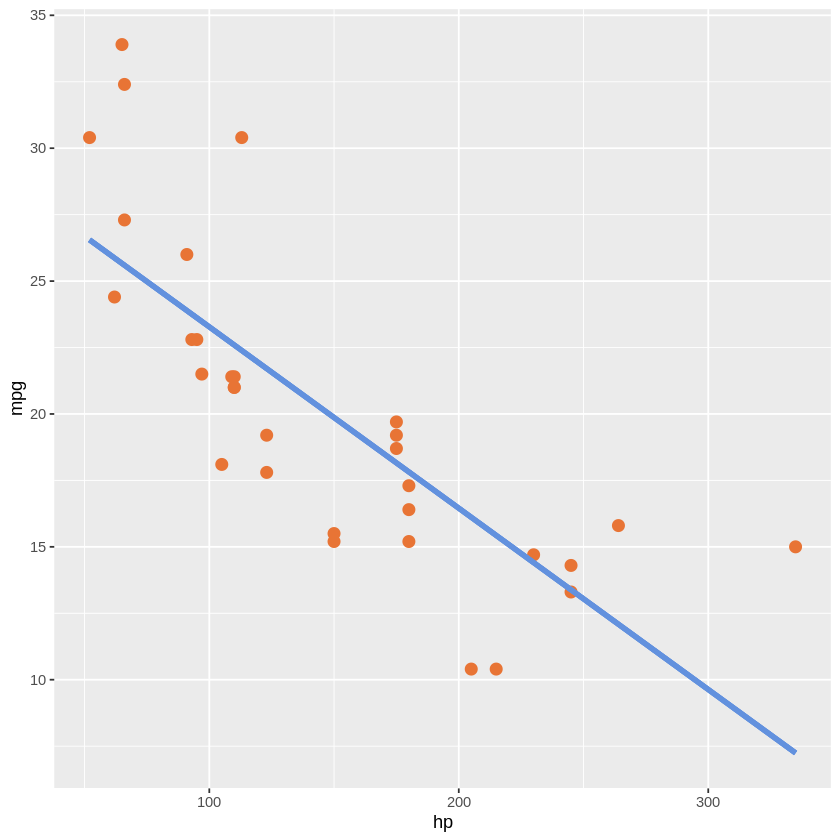

In [116]:
plt + geom_line(aes(hp, predicted), color='#6291de', linewidth=1.5) 

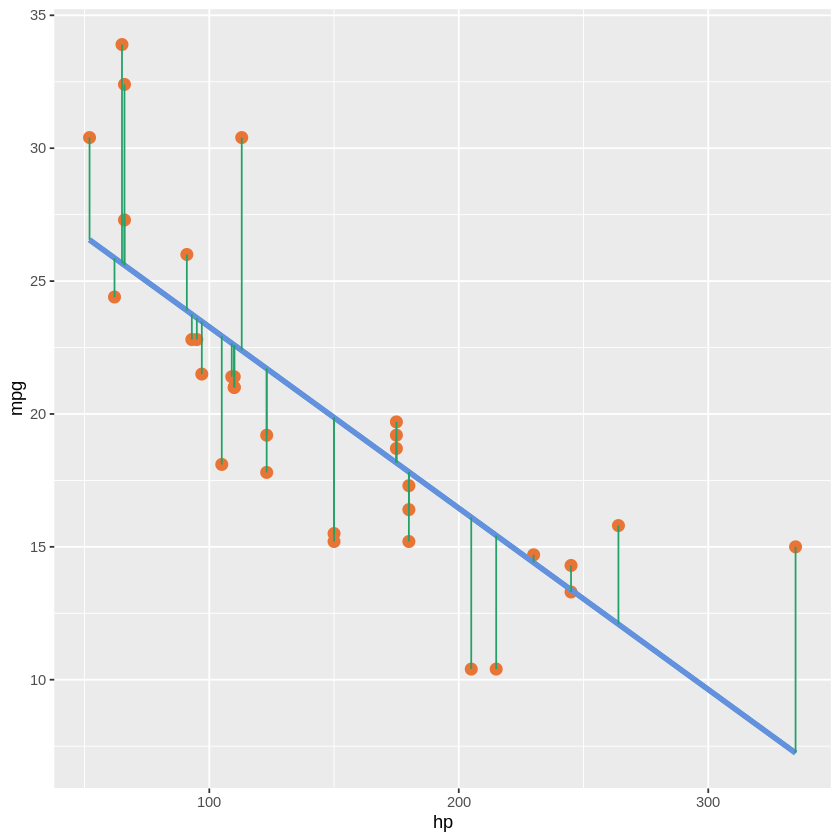

In [120]:
plt + geom_segment(aes(xend = hp, yend = predicted), color = '#23a168')

Some data need more complex model then a simple linear regression to minimize residuals. We can try a little experiment:

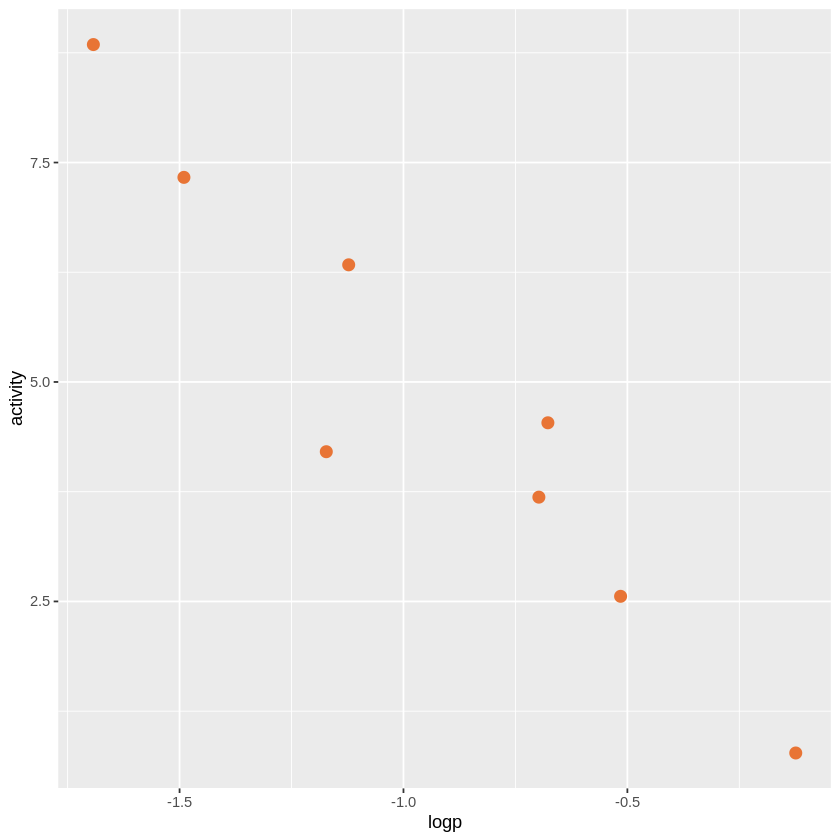

In [121]:
logp <- -0.2*1:8 + 0.1*rnorm(8)
activity <- 1:8 + rnorm(8)
ggplot(data.frame(logp, activity), aes(logp, activity)) +
      geom_point(color='#e87435', size=3)


In [125]:
# let's try ANOVA to tell us whether polarity of molecules matter

model <- lm(activity ~ logp)
model


Call:
lm(formula = activity ~ logp)

Coefficients:
(Intercept)         logp  
     0.3423      -4.7428  


In [126]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
logp,1,43.41665,43.4166533,56.67551,0.0002846119
Residuals,6,4.59634,0.7660567,NA,NA


In addition to the linear model, we want to test a second order polynomial. We can use lm() function, becouse it is a general linear model, we can describe dependent variable as a linear combination:  $x^2, x^1, x^0$

In [136]:
model_poly <- lm(activity ~ poly(logp, 2))
model_poly


Call:
lm(formula = activity ~ poly(logp, 2))

Coefficients:
   (Intercept)  poly(logp, 2)1  poly(logp, 2)2  
        4.7837         -6.5891          0.1509  


In [131]:
anova(model_poly)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
"poly(logp, 2)",2,43.439412,21.7197061,23.74475,0.002800554
Residuals,5,4.573581,0.9147162,NA,NA


In [141]:
anova(model, model_poly)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6,4.596340,NA,NA,NA,NA
2,5,4.573581,1,0.02275888,0.0248808,0.8808367


In [154]:
x <- seq(0, 3, 0.1)
y <- sin(x)
model <- lm(y ~ x)
model
anova(model)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
    0.56092      0.05517  


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,0.07548594,0.07548594,0.7855018,0.3827546
Residuals,29,2.78687110,0.09609900,NA,NA


In [155]:
model_poly <- lm(y ~ poly(x, 2))
model_poly
anova(model_poly)


Call:
lm(formula = y ~ poly(x, 2))

Coefficients:
(Intercept)  poly(x, 2)1  poly(x, 2)2  
     0.6437       0.2747      -1.6667  


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
"poly(x, 2)",2,2.853252365,1.4266261826,4387.366,1.085345e-35
Residuals,28,0.009104673,0.0003251669,NA,NA


In [159]:
anv <- anova(model, model_poly)
anv

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,29,2.786871101,NA,NA,NA,NA
2,28,0.009104673,1,2.777766,8542.587,2.361631e-36


[1] 2.786871101 0.009104673

### SSE
Sum of Squares Error, or SSE. This error is the difference between the observed value and the predicted value. The smaller the error, the better the estimation power of the regression. SSE is also known as RSS - Sum of Squared Residuals.
<br>
$SSE = Y'Y - \hat{\beta}X'Y $
<br>
<br>

### SST 
Sum of Squares Total is the squared differences between the observed dependent variable and its mean. 
<br>
$SST = \sum_{i=1}^{n} (y_i - \bar{y})^2$
<br>
<br>
### $R^2$
A Statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. 
<br>
$R^2 = 1 - (SSE/SST)$